ABHISHEK J - 24BAD002
Gaussian Naive Bayes - Iris Dataset

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Dataset Shape: (150, 5)

Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

===== MODEL EVALUATION =====
Accuracy : 1.0
Precision

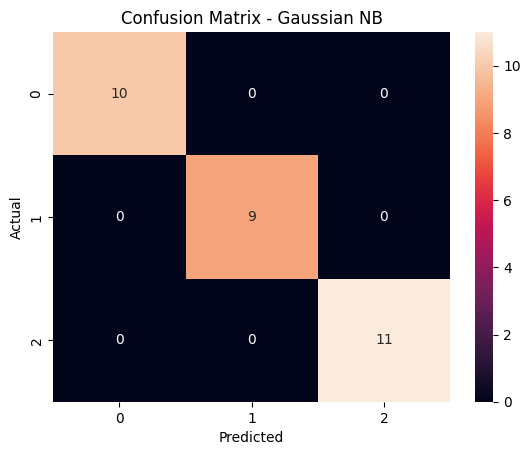


Actual vs Predicted (First 10 Rows):
   Actual  Predicted
0       1          1
1       0          0
2       2          2
3       1          1
4       1          1
5       0          0
6       1          1
7       2          2
8       1          1
9       1          1

Class Probabilities (First 5 Test Samples):
[[5.97322611e-090 9.95635768e-001 4.36423247e-003]
 [1.00000000e+000 4.96157683e-014 6.54921950e-021]
 [7.31861098e-290 4.92947289e-012 1.00000000e+000]
 [2.81838335e-094 9.77593560e-001 2.24064404e-002]
 [1.13876385e-105 8.70022604e-001 1.29977396e-001]]

Logistic Regression Accuracy: 1.0


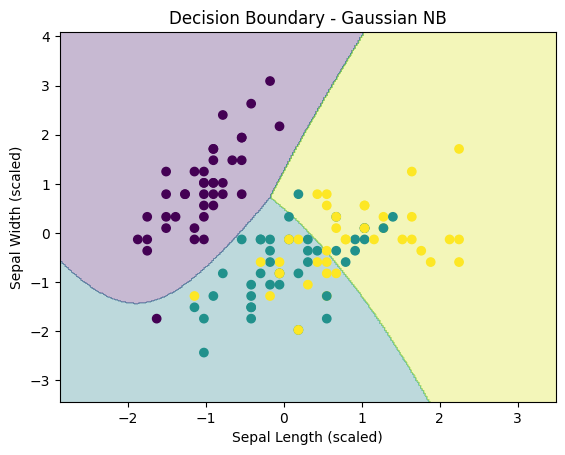

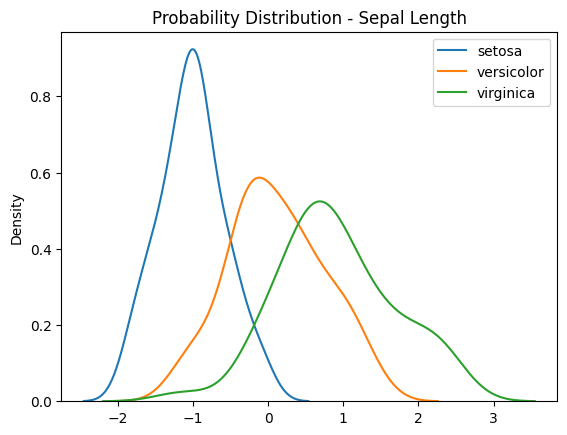

In [1]:
print("ABHISHEK J - 24BAD002")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

print("Gaussian Naive Bayes - Iris Dataset")
iris = load_iris()
X = iris.data
y = iris.target
print("\nFeature Names:", iris.feature_names)
print("Target Names:", iris.target_names)
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("\n===== MODEL EVALUATION =====")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Gaussian NB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
print("\nActual vs Predicted (First 10 Rows):")
print(comparison.head(10))
print("\nClass Probabilities (First 5 Test Samples):")
print(gnb.predict_proba(X_test[:5]))
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)

print("\nLogistic Regression Accuracy:",
      accuracy_score(y_test, y_lr))
X2 = X_scaled[:, :2]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, test_size=0.2, random_state=42)

gnb2 = GaussianNB()
gnb2.fit(X_train2, y_train2)
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = gnb2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=y_train2)
plt.title("Decision Boundary - Gaussian NB")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.show()
plt.figure()
for i in range(3):
    sns.kdeplot(X_scaled[y == i, 0], label=iris.target_names[i])
plt.title("Probability Distribution - Sepal Length")
plt.legend()
plt.show()